### Import the libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
## Load the dataset
url='C:/Users/sanj/Documents/AI_Class/ML_Assignment/machine-learning-linear-regression-group-7/data/BostonHousing.csv'
boston=pd.read_csv(url)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [16]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

##### Visualize relationships between features and the target variable.

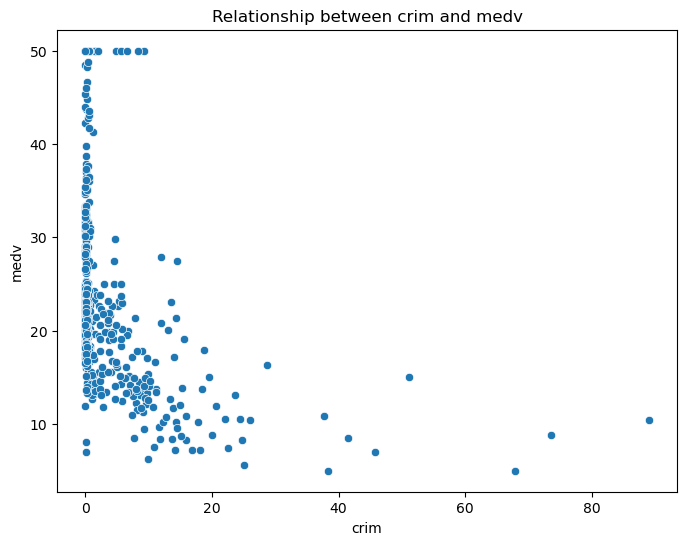

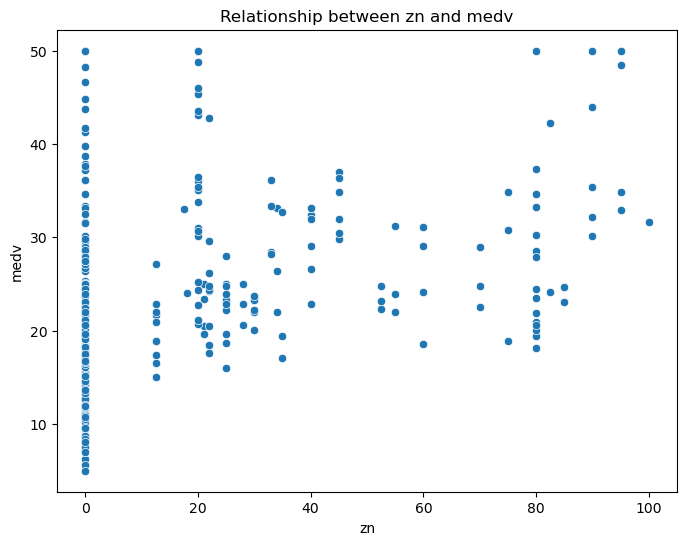

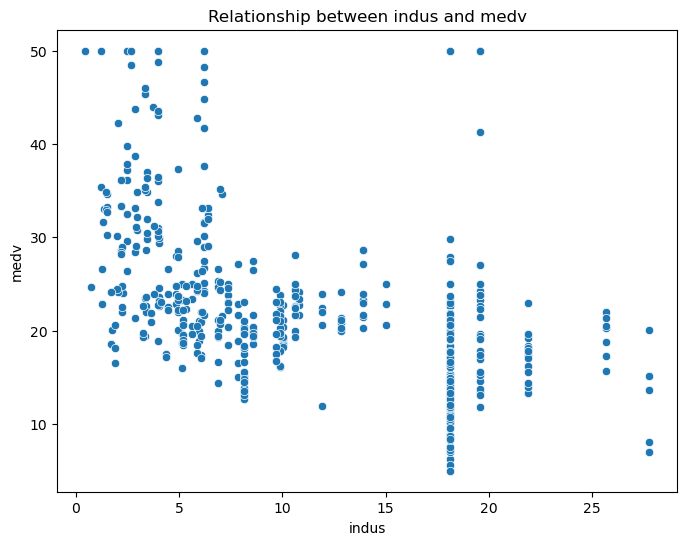

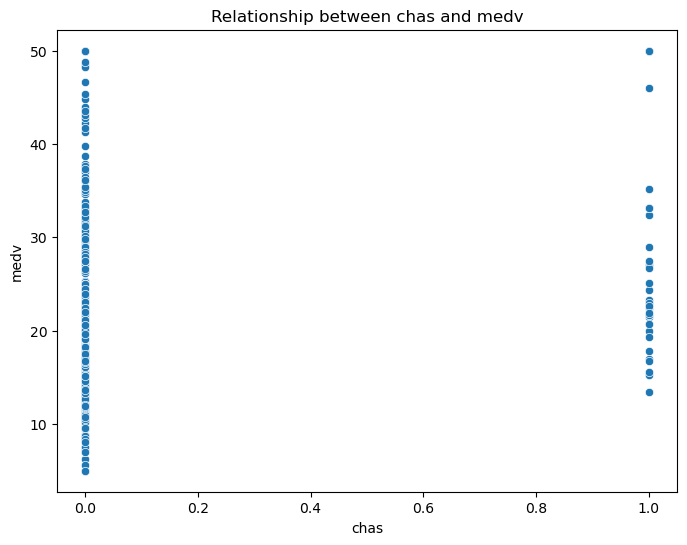

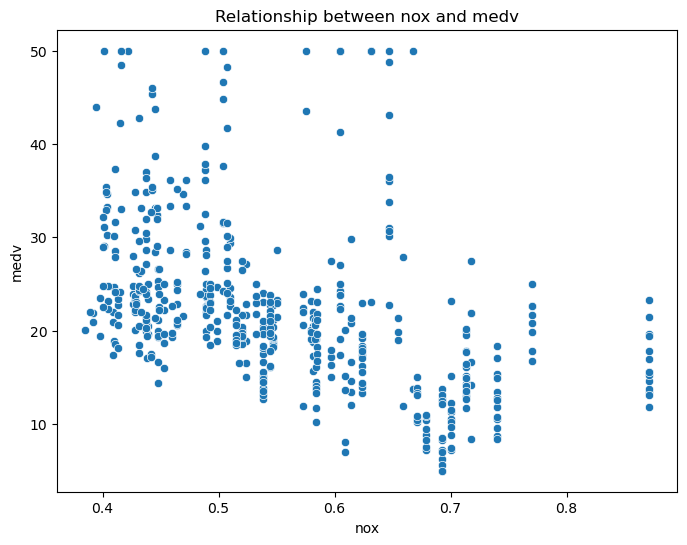

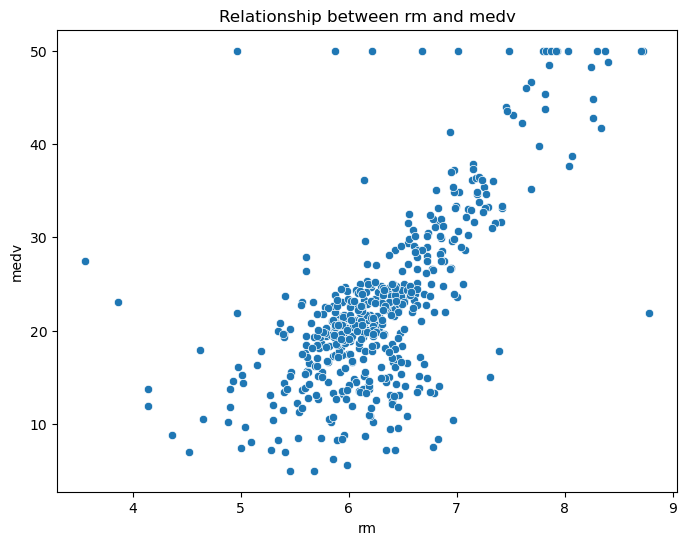

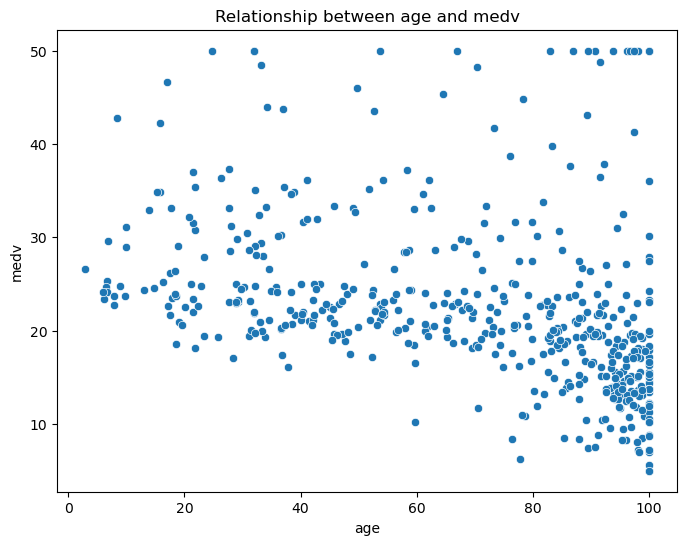

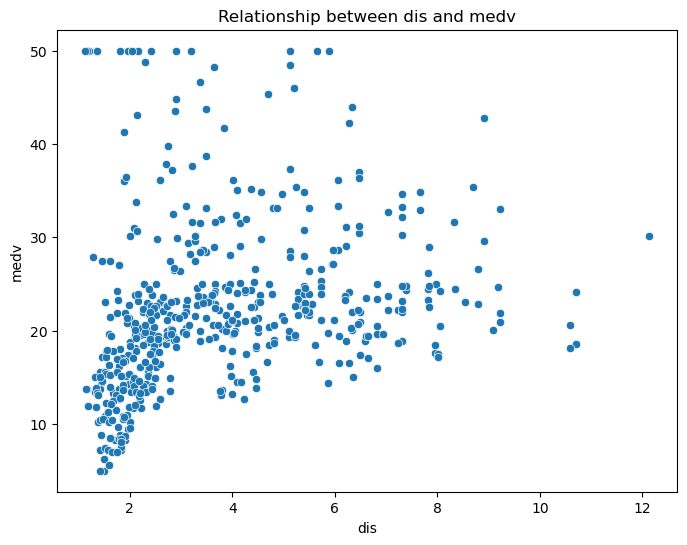

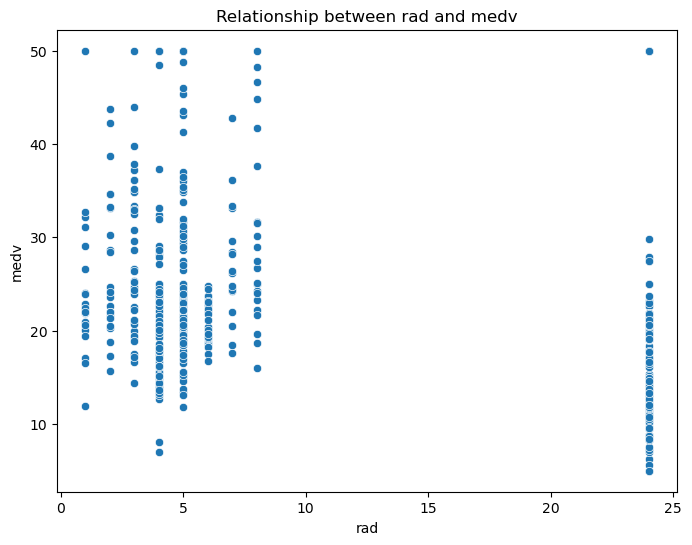

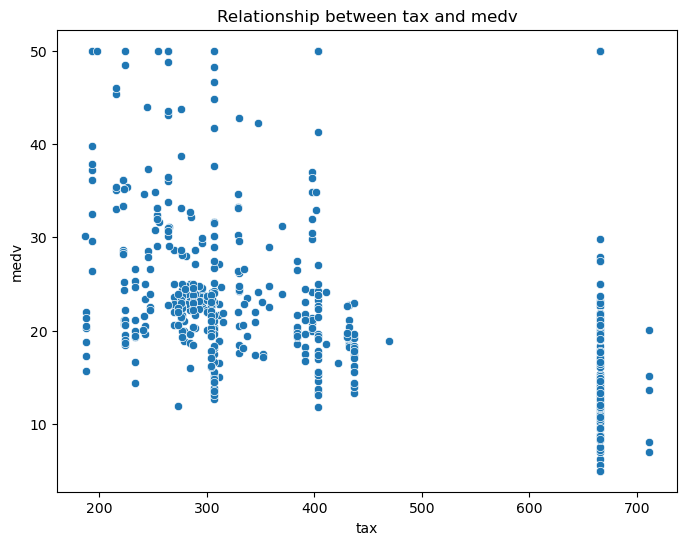

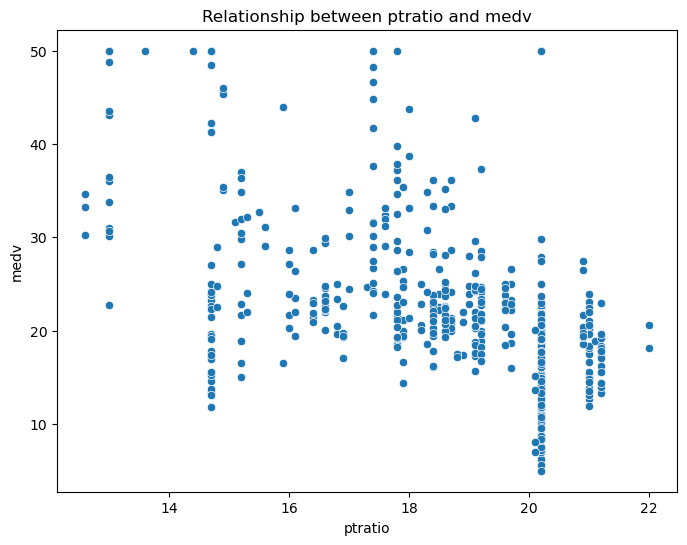

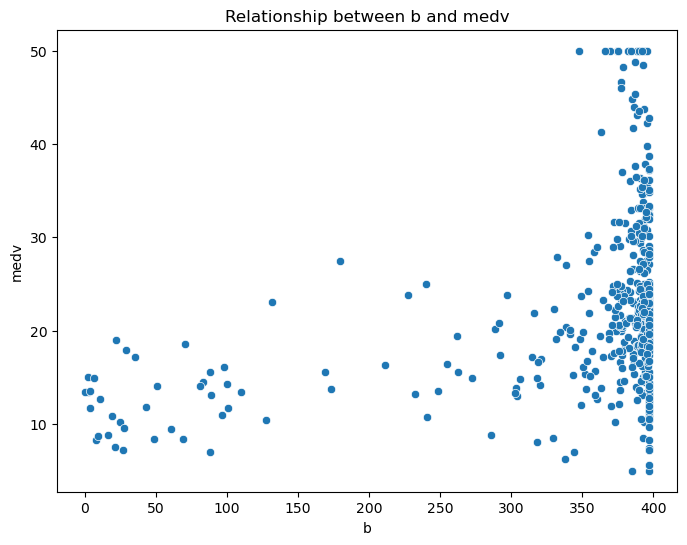

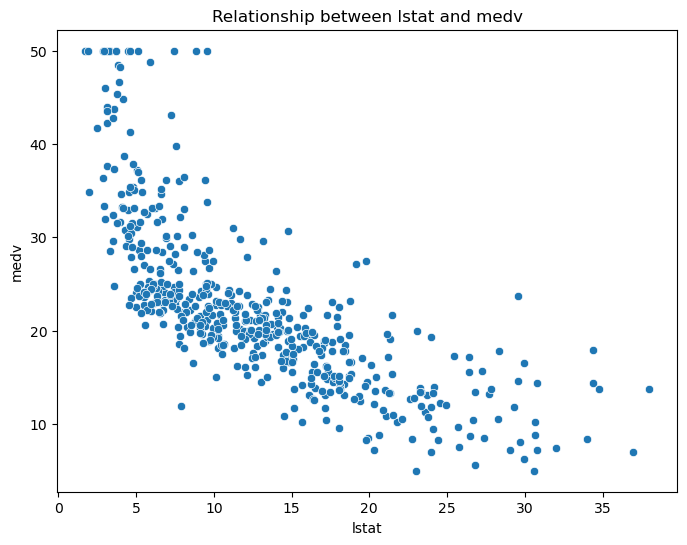

In [18]:
target_variable = 'medv'
for column in boston.columns:
    if column != target_variable:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=boston, x=column, y=target_variable)
        plt.title(f'Relationship between {column} and {target_variable}')
        plt.show()

##### identifying outliers

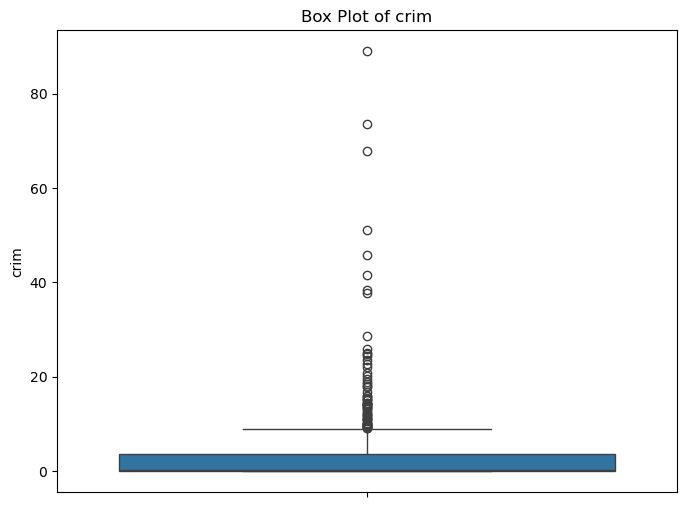

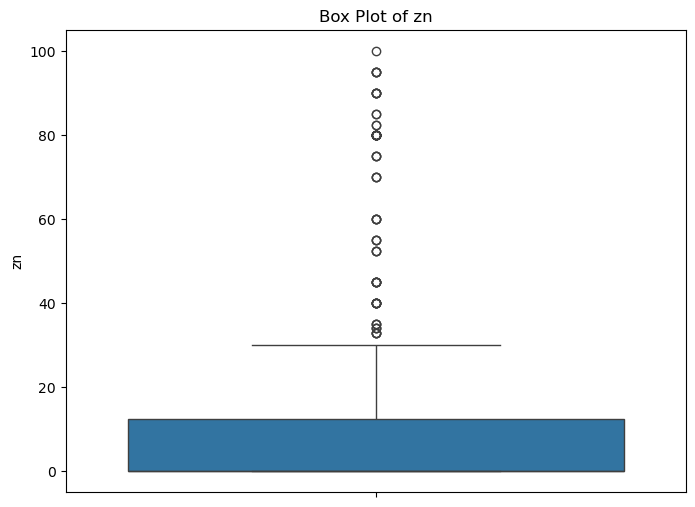

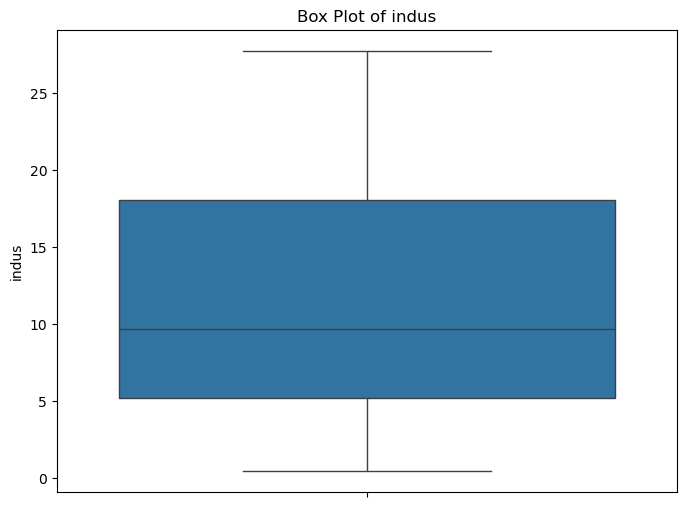

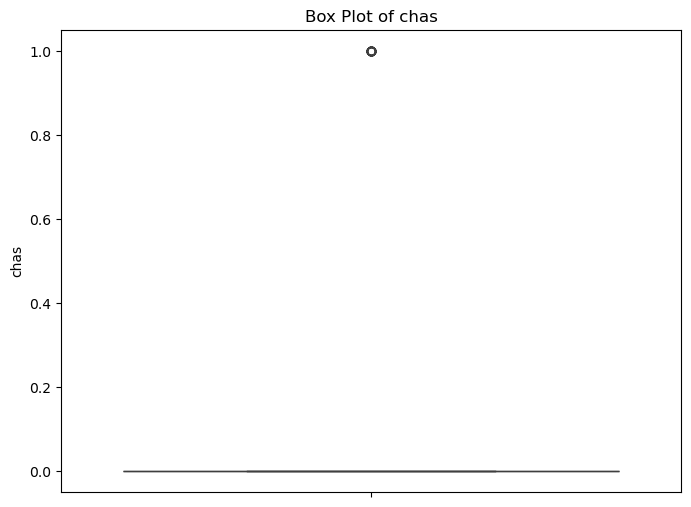

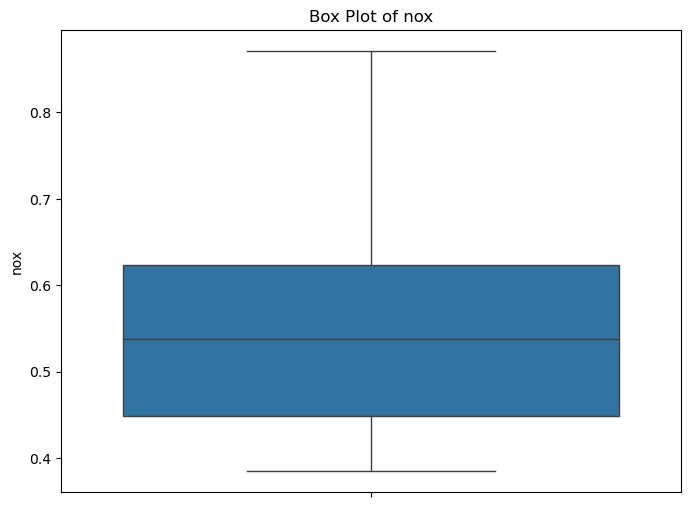

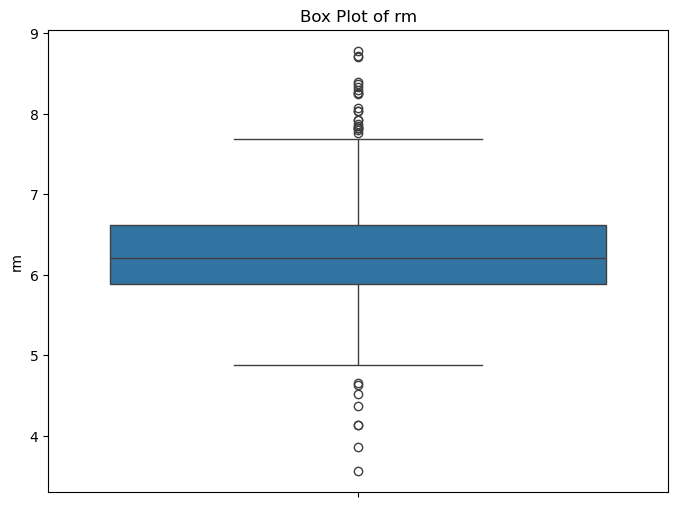

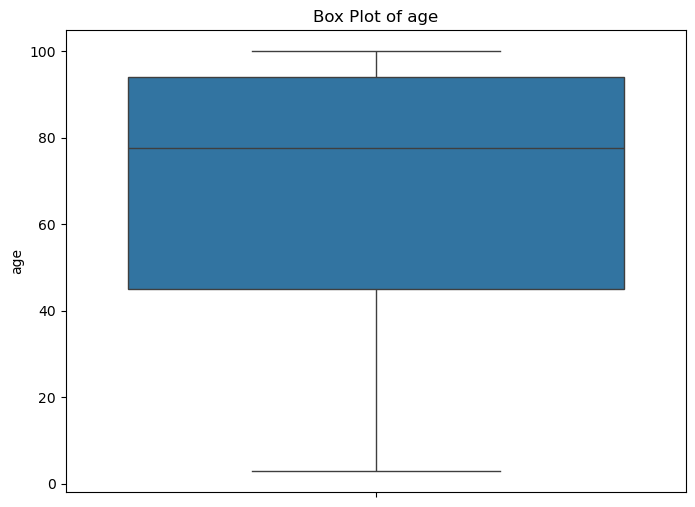

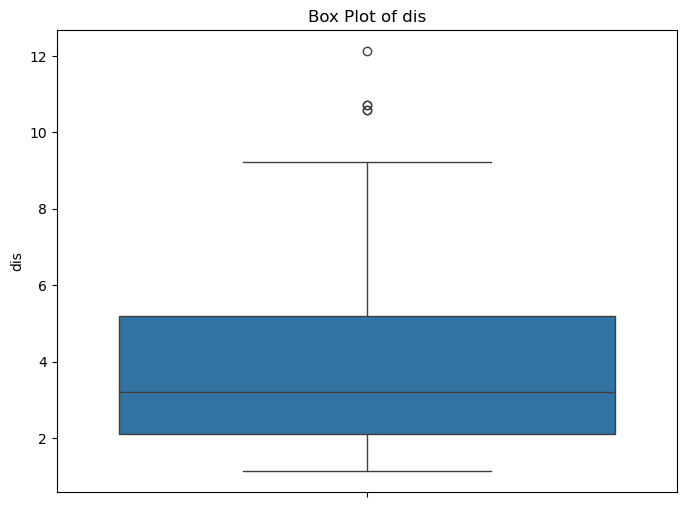

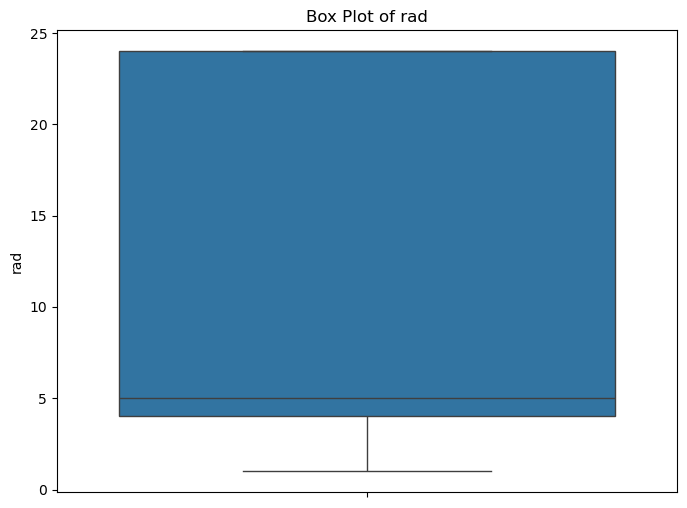

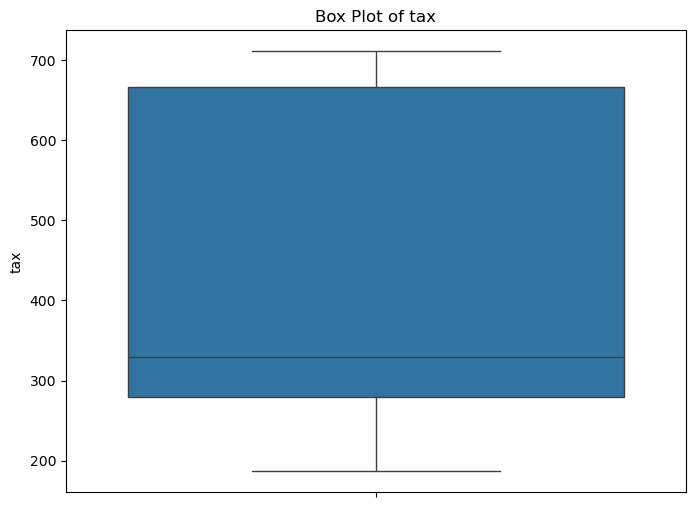

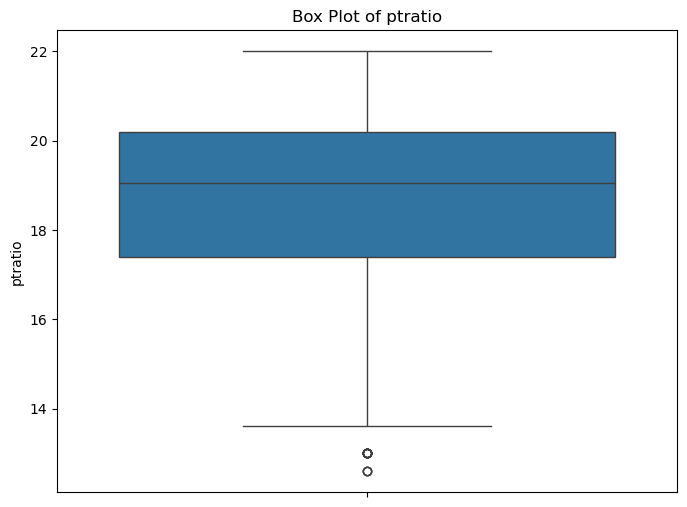

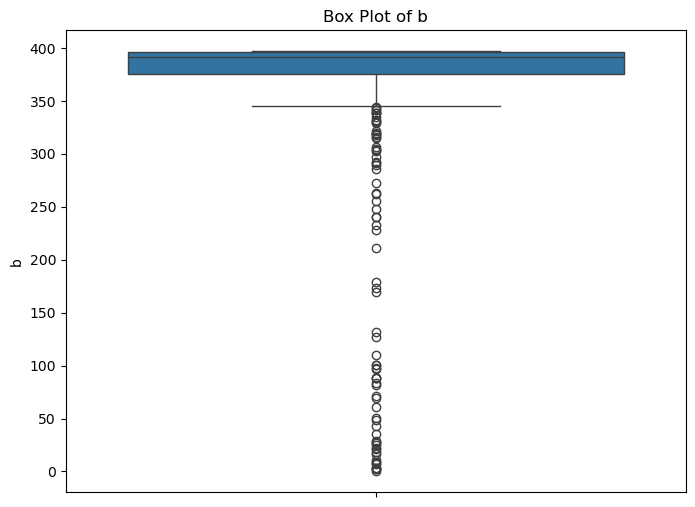

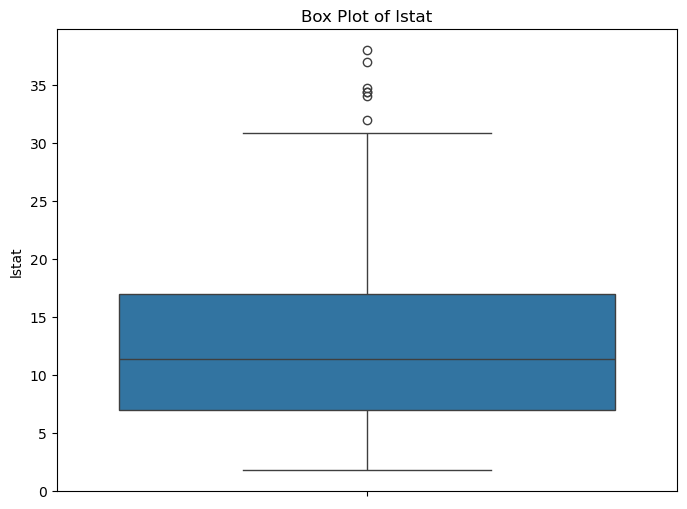

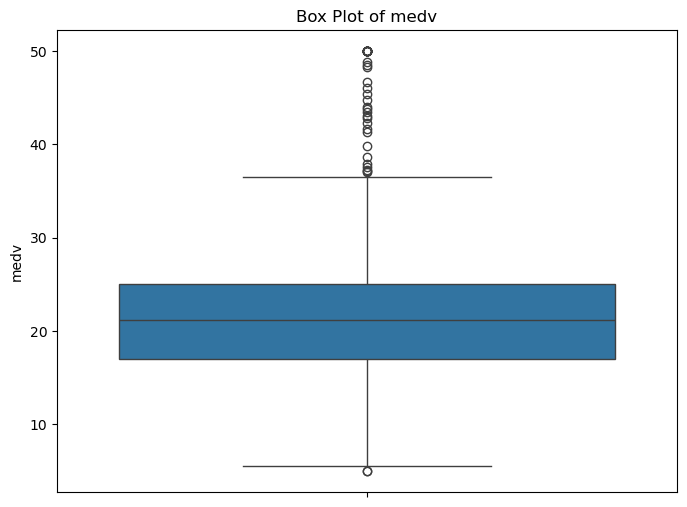

In [19]:
import seaborn as sns
for column in boston.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=boston[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [21]:
## detect outliers using 

def detect_outliers_iqr(boston):
    outliers_dict = {}
    for column in boston.columns:
        if boston[column].dtype in ['int64', 'float64']:
            Q1 = boston[column].quantile(0.25)
            Q3 = boston[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = boston[(boston[column] < lower_bound) | (boston[column] > upper_bound)]
            outliers_dict[column] = outliers
    return outliers_dict


In [22]:
# detect outliers
outliers_dict = detect_outliers_iqr(boston)

In [25]:
# Display outliers
for column, outliers in outliers_dict.items():
    if not outliers.empty:
        print(f"Outliers in {column}:\n", outliers)

Outliers in crim:
         crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
367  13.5222  0.0   18.1     0  0.631  3.863  100.0  1.5106   24  666   
371   9.2323  0.0   18.1     0  0.631  6.216  100.0  1.1691   24  666   
373  11.1081  0.0   18.1     0  0.668  4.906  100.0  1.1742   24  666   
374  18.4982  0.0   18.1     0  0.668  4.138  100.0  1.1370   24  666   
375  19.6091  0.0   18.1     0  0.671  7.313   97.9  1.3163   24  666   
..       ...  ...    ...   ...    ...    ...    ...     ...  ...  ...   
468  15.5757  0.0   18.1     0  0.580  5.926   71.0  2.9084   24  666   
469  13.0751  0.0   18.1     0  0.580  5.713   56.7  2.8237   24  666   
477  15.0234  0.0   18.1     0  0.614  5.304   97.3  2.1007   24  666   
478  10.2330  0.0   18.1     0  0.614  6.185   96.7  2.1705   24  666   
479  14.3337  0.0   18.1     0  0.614  6.229   88.0  1.9512   24  666   

     ptratio       b  lstat  medv  
367     20.2  131.42  13.33  23.1  
371     20.2  366.15   9.53  50.